In [9]:
import pandas as pd
import numpy as np
import algos.shallow_nn as shallow_nn
import algos.logistic_regression as logistic_regression
import pylab as plt

In [10]:
data = pd.read_csv("datasets/heart.csv")
data = data.sample(frac=1).reset_index(drop=True)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
1,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
2,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
3,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
4,58,1,2,105,240,0,0,154,1,0.6,1,0,3,1


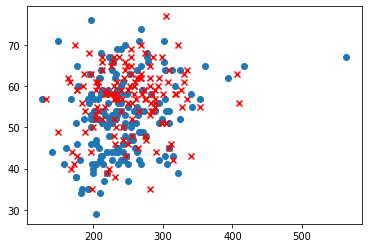

In [11]:
plt.scatter(data[data.target == 1]["chol"], data[data.target == 1]["age"], marker="o")

plt.scatter(data[data.target == 0]["chol"], data[data.target == 0]["age"], marker="x", color="red")

In [12]:
y = data["target"]

features = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
X = pd.get_dummies(data[features])

y = np.array([y]).T
X = np.array(X)

y = y.astype(np.float)
X = y.astype(np.float)

X_train = X[:(int(len(X)*0.75)), :].T
X_val = X[(int(len(X)*0.75)):, :].T
y_train = y[:(int(len(X)*0.75)), :].T
y_val = y[(int(len(X)*0.75)):, :].T


In [13]:
nn_model = shallow_nn.model(X_train, y_train, X_val, y_val, n_h = 5, learning_rate=0.1, print_cost = True)

Cost after iteration 0: 0.693071
Cost after iteration 500: 0.019723
Cost after iteration 1000: 0.006128
Cost after iteration 1500: 0.003475
train accuracy: 100.0 %
test accuracy: 100.0 %


In [14]:
lr_model = logistic_regression.model(X_train, y_train, X_val, y_val, num_iterations=2000, learning_rate=0.5, print_cost=True, reg_term=1)

Cost after iteration 0: 0.693147
Cost after iteration 500: 0.127662
Cost after iteration 1000: 0.127563
Cost after iteration 1500: 0.127562
train accuracy: 100.0 %
test accuracy: 100.0 %
